In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator
from tensorflow.keras.layers import Dropout

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

from keras import backend as K

%matplotlib inline
np.random.seed(1)

In [5]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


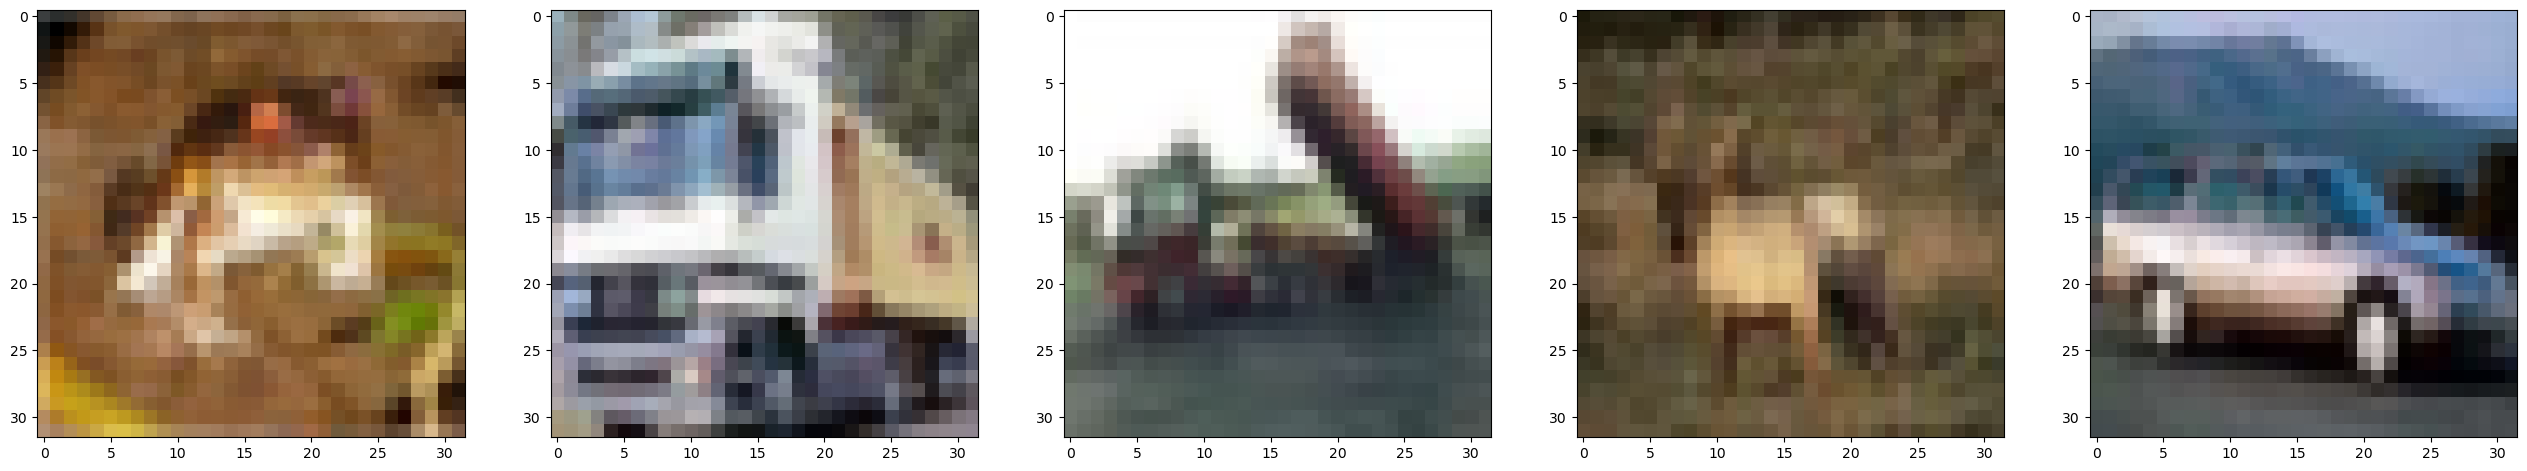

In [6]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:10]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(32, 12)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Normalize the image data
x_train = X_train / 255.
x_test = X_test / 255.

# Initialize the OneHotEncoder
enc = OneHotEncoder(sparse=False)  # Ensure output is not sparse

# One-hot encode the labels
# Reshape y_train and y_test to be 2D arrays as expected by OneHotEncoder
Y_train = enc.fit_transform(y_train.reshape(-1, 1)).astype('float32')
Y_test = enc.transform(y_test.reshape(-1, 1)).astype('float32')

# Print shapes to verify
print("y_train example before encoding:", y_train[0])
print("y_train example after encoding:", Y_train[0])
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


y_train example before encoding: [6]
y_train example after encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
# LENETconvolutional_model
from tensorflow.keras.layers import Dropout

def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    ## LENET
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(8, 5, activation='relu',padding = 'same', strides=1)(input_img)
    P1 = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(Z1)
    Z2 = tfl.Conv2D(16, 5, activation='relu', strides=1)(P1)
    P2 = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(Z2)
    F1 = tfl.Flatten()(P2)
    F2 = tfl.Dense(84, activation='relu')(F1) 
    D1 = tfl.Dropout(0.1)(F2)
    
    outputs = tfl.Dense(10, activation='softmax')(D1)
    
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [11]:
conv_model = convolutional_model((32, 32, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0     

In [12]:
import tensorflow as tf

# Prepare your datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, Y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, Y_test)).batch(32)

# Define the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=6,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,          # Log a message when training is stopped
    mode='min',         # The training will stop when the quantity monitored has stopped decreasing
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity.
)

# Train the model with the EarlyStopping callback
history = conv_model.fit(
    train_dataset, 
    epochs=40, 
    validation_data=test_dataset,
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)


Epoch 1/40
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5690 - accuracy: 0.4300 - val_loss: 1.3860 - val_accuracy: 0.5038
Epoch 2/40
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2900 - accuracy: 0.5426 - val_loss: 1.2278 - val_accuracy: 0.5626
Epoch 3/40
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1704 - accuracy: 0.5816 - val_loss: 1.1261 - val_accuracy: 0.6015
Epoch 4/40
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0935 - accuracy: 0.6120 - val_loss: 1.0799 - val_accuracy: 0.6209
Epoch 5/40
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0352 - accuracy: 0.6351 - val_loss: 1.0739 - val_accuracy: 0.6201
Epoch 6/40
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9944 - accuracy: 0.6464 - val_loss: 1.0507 - val_accuracy: 0.6306
Epoch 7/40
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9568 - accuracy: 0.6620 - val_loss: 1.0427 -

In [20]:
from tensorflow.keras.models import Model, load_model

In [21]:
conv_model.save('1_model.h5')  # Saving the model

In [22]:
# Next time, instead of retraining, you load the model
model = load_model('1_model.h5')

In [23]:
from sklearn.metrics import f1_score
import numpy as np

# Predicting the labels
y_pred = conv_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate F1 Score
# Ensure `y_test` is not one-hot encoded; if it is, convert it similarly to `y_pred_labels`
f1 = f1_score(y_test, y_pred_labels, average='weighted')  # Use 'micro', 'macro', or 'weighted' for multi-class classification
print(f"F1 Score: {f1}")


313/313 [==============================] - 0s 1ms/step
F1 Score: 0.6457282114737203


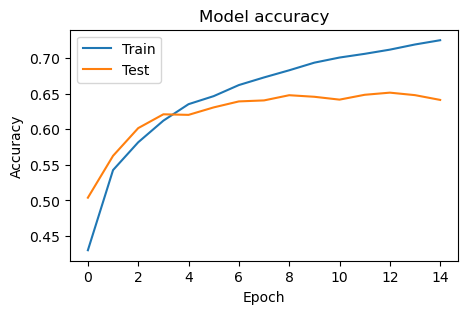

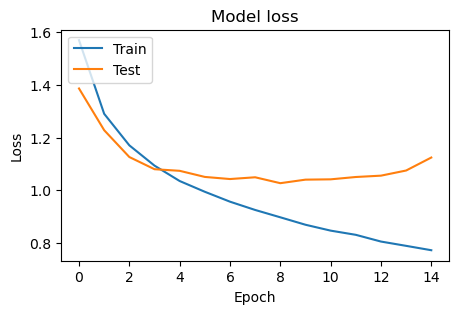

In [24]:
import matplotlib.pyplot as plt

# Adjusting figure size for the accuracy plot
plt.figure(figsize=(5, 3))  # Set the figure size

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()  # Show the plot

# Adjusting figure size for the loss plot
plt.figure(figsize=(5, 3))  # Set the figure size again for the new plot

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()  # Show the plot


Input image shape: (1, 32, 32, 3)
1/1 [==============================] - 0s 13ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[3.90277011e-04 1.68913732e-06 2.72447534e-04 7.22709775e-01
  5.49100107e-03 2.68032491e-01 8.02934228e-04 2.28366093e-03
  1.28623005e-05 2.94439360e-06]]
Class: 3


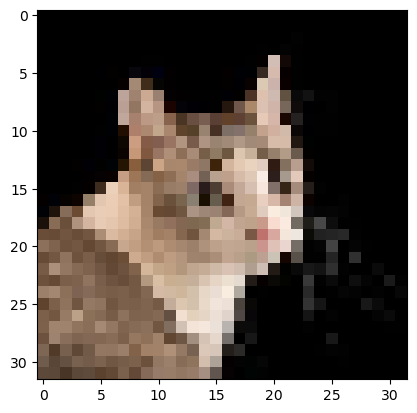

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
img_path = 'images\download.jpg'
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0
x2 = x 
print('Input image shape:', x.shape)
imshow(img)
prediction = conv_model.predict(x2)
print("Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ", prediction)
print("Class:", np.argmax(prediction))


Input image shape: (1, 32, 32, 3)
1/1 [==============================] - 0s 13ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[3.90277011e-04 1.68913732e-06 2.72447534e-04 7.22709775e-01
  5.49100107e-03 2.68032491e-01 8.02934228e-04 2.28366093e-03
  1.28623005e-05 2.94439360e-06]]
Class index: 3
Class name: cat


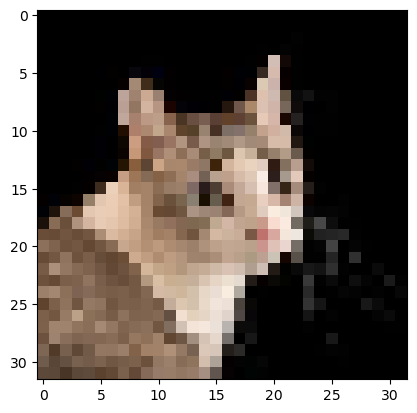

In [26]:

import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
# Define the class names for CIFAR-10 dataset
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

# Correcting the file path for cross-platform compatibility
img_path = 'images\download.jpg'  # Use a raw string or replace \ with /

# Load and preprocess the image
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0  # Normalize the image

print('Input image shape:', x.shape)
imshow(img)  # Display the image

# Make a prediction using the convolutional model
prediction = conv_model.predict(x)
print("Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ", prediction)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest prediction score

# Print the class index and name using the predicted_class_index
print("Class index:", predicted_class_index)
print("Class name:", class_names[predicted_class_index])


Input image shape: (1, 32, 32, 3)
1/1 [==============================] - 0s 13ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[0.01921903 0.00205403 0.09062077 0.4459989  0.03503903 0.27811533
  0.00184686 0.01325792 0.0992655  0.01458252]]
Class index: 3
Class name: cat


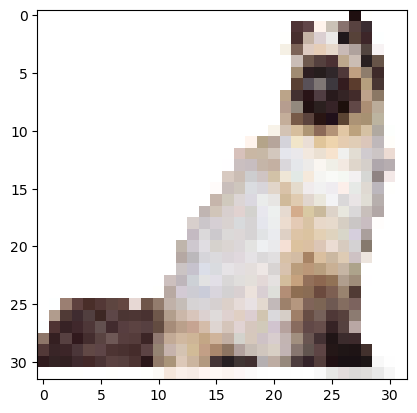

In [27]:

import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import imshow
# Define the class names for CIFAR-10 dataset
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

# Correcting the file path for cross-platform compatibility
img_path = 'images\my_image.jpg'  # Use a raw string or replace \ with /

# Load and preprocess the image
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0  # Normalize the image

print('Input image shape:', x.shape)
imshow(img)  # Display the image

# Make a prediction using the convolutional model
prediction = conv_model.predict(x)
print("Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ", prediction)
predicted_class_index = np.argmax(prediction)  # Get the index of the highest prediction score

# Print the class index and name using the predicted_class_index
print("Class index:", predicted_class_index)
print("Class name:", class_names[predicted_class_index])
